In [2]:
import pandas as pd
import numpy as np
import json
import requests
from pprint import pprint
from config import api_key

API_KEY = api_key
API_HOST = 'https://api.yelp.com'
API_URL = 'https://api.yelp.com/v3/businesses/search?term='

# https://api.yelp.com/v3/businesses/search?term=breweries&location=kansascity

In [3]:
def get_local_breweries(term):
    url = API_URL + term + '&location=kansascity'
    headers = {'Authorization': f"Bearer {API_KEY}"}
    return requests.get(url, headers=headers)

In [4]:
results = get_local_breweries('brewpubs')

results_json = results.json()

pprint(results_json)

brewpub_df_business = pd.DataFrame.from_dict(results_json['businesses'])

{'businesses': [{'alias': 'casual-animal-brewing-company-kansas-city',
                 'categories': [{'alias': 'brewpubs', 'title': 'Brewpubs'}],
                 'coordinates': {'latitude': 39.09241,
                                 'longitude': -94.5797599},
                 'display_phone': '(816) 214-5388',
                 'distance': 486.7600475543884,
                 'id': 'Feaue0piaXCKRU-XeZPv8w',
                 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/G2cZSBr_HseItC9NTj7iCA/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '1725 McGee St',
                              'address2': '',
                              'address3': None,
                              'city': 'Kansas City',
                              'country': 'US',
                              'display_address': ['1725 McGee St',
                                                  'Kansas City, MO 64108'],
                              'state': 'MO',
        

In [5]:
brewpub_df_business.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,casual-animal-brewing-company-kansas-city,"[{'alias': 'brewpubs', 'title': 'Brewpubs'}]","{'latitude': 39.09241, 'longitude': -94.5797599}",(816) 214-5388,486.760048,Feaue0piaXCKRU-XeZPv8w,https://s3-media3.fl.yelpcdn.com/bphoto/G2cZSB...,False,"{'address1': '1725 McGee St', 'address2': '', ...",Casual Animal Brewing Company,+18162145388,$$,4.5,31,[],https://www.yelp.com/biz/casual-animal-brewing...
1,mccoys-public-house-kansas-city,"[{'alias': 'comfortfood', 'title': 'Comfort Fo...","{'latitude': 39.0535072, 'longitude': -94.5917...",(816) 960-0866,4725.669934,h2Oag6niq9J5-QBIH6yp0A,https://s3-media2.fl.yelpcdn.com/bphoto/Xi2bUd...,False,"{'address1': '4057 Pennsylvania Ave', 'address...",McCoy's Public House,+18169600866,$$,4.0,496,[],https://www.yelp.com/biz/mccoys-public-house-k...
2,stockyards-brewing-kansas-city,"[{'alias': 'breweries', 'title': 'Breweries'}]","{'latitude': 39.094272, 'longitude': -94.605644}",(816) 895-8880,1831.641959,vahD1R2WKqoemGhmySlyKA,https://s3-media4.fl.yelpcdn.com/bphoto/B12X8W...,False,"{'address1': '1600 Genessee St', 'address2': '...",Stockyards Brewing,+18168958880,$$,4.5,56,[],https://www.yelp.com/biz/stockyards-brewing-ka...
3,strange-days-brewing-co-kansas-city,"[{'alias': 'brewpubs', 'title': 'Brewpubs'}]","{'latitude': 39.11016, 'longitude': -94.57997}",(816) 469-5321,1681.572598,Fo4vVpVMQAB5SAxWxQ-03A,https://s3-media1.fl.yelpcdn.com/bphoto/y9PHzb...,False,"{'address1': '316 Oak St', 'address2': '', 'ad...",Strange Days Brewing Co.,+18164695321,$$,4.5,21,[],https://www.yelp.com/biz/strange-days-brewing-...
4,brewery-emperial-kansas-city,"[{'alias': 'breweries', 'title': 'Breweries'},...","{'latitude': 39.09062, 'longitude': -94.57865}",(816) 945-9625,690.039230,u3uvK4320pLOYP2rQ_gzKA,https://s3-media3.fl.yelpcdn.com/bphoto/FIMlXL...,False,"{'address1': '1829 Oak St', 'address2': '', 'a...",Brewery Emperial,+18169459625,$$,4.5,130,[],https://www.yelp.com/biz/brewery-emperial-kans...


In [6]:
brewpub_df_business.sort_values('rating',ascending=False)
brewpub_df_business.head(2)

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,casual-animal-brewing-company-kansas-city,"[{'alias': 'brewpubs', 'title': 'Brewpubs'}]","{'latitude': 39.09241, 'longitude': -94.5797599}",(816) 214-5388,486.760048,Feaue0piaXCKRU-XeZPv8w,https://s3-media3.fl.yelpcdn.com/bphoto/G2cZSB...,False,"{'address1': '1725 McGee St', 'address2': '', ...",Casual Animal Brewing Company,+18162145388,$$,4.5,31,[],https://www.yelp.com/biz/casual-animal-brewing...
1,mccoys-public-house-kansas-city,"[{'alias': 'comfortfood', 'title': 'Comfort Fo...","{'latitude': 39.0535072, 'longitude': -94.5917...",(816) 960-0866,4725.669934,h2Oag6niq9J5-QBIH6yp0A,https://s3-media2.fl.yelpcdn.com/bphoto/Xi2bUd...,False,"{'address1': '4057 Pennsylvania Ave', 'address...",McCoy's Public House,+18169600866,$$,4.0,496,[],https://www.yelp.com/biz/mccoys-public-house-k...


In [9]:
brewpub_df_business_clean = brewpub_df_business
del brewpub_df_business_clean["categories"]
del brewpub_df_business_clean["alias"]
del brewpub_df_business_clean["coordinates"]
del brewpub_df_business_clean["display_phone"]
del brewpub_df_business_clean["distance"]
del brewpub_df_business_clean["id"]
del brewpub_df_business_clean["is_closed"]
del brewpub_df_business_clean["location"]
del brewpub_df_business_clean["phone"]
del brewpub_df_business_clean["price"]
del brewpub_df_business_clean["review_count"]
del brewpub_df_business_clean["transactions"]
del brewpub_df_business_clean["url"]
del brewpub_df_business_clean["image_url"]
brewpub_df_business_clean.head()

KeyError: 'categories'

In [10]:
brewpub_renamed = brewpub_df_business_clean.rename(columns={"rating":"Yelp Rating Out of 5 Stars", "name":"Name"})
brewpub_renamed = brewpub_renamed[['Yelp Rating Out of 5 Stars', "Name"]]
brewpub_renamed = brewpub_renamed.reset_index(drop=True)
brewpub_renamed.head()

,Yelp Rating Out of 5 Stars,Name
0,4.5,Casual Animal Brewing Company
1,4.0,McCoy's Public House
2,4.5,Stockyards Brewing
3,4.5,Strange Days Brewing Co.
4,4.5,Brewery Emperial


In [14]:
brewpub_renamed.sort_values('Yelp Rating Out of 5 Stars', ascending = False)
brewpub_renamed.to_csv("YelpResults.csv", index = False, header = True)
brewpub_renamed

,Yelp Rating Out of 5 Stars,Name
0,4.5,Casual Animal Brewing Company
1,4.0,McCoy's Public House
2,4.5,Stockyards Brewing
3,4.5,Strange Days Brewing Co.
4,4.5,Brewery Emperial
5,4.5,Cinder Block Brewery
6,4.5,Kansas City Bier Company
7,4.5,Boulevard Brewing
8,4.0,Flying Saucer Draught Emporium
9,4.0,Martin City Brewing Company


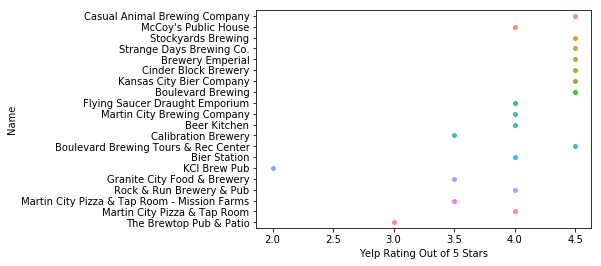

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
sns.swarmplot(x = 'Yelp Rating Out of 5 Stars', y = 'Name', data = brewpub_renamed)
# plt.savefig("Yelp Ratings.PNG", dpi = 200)

plt.savefig("Yelp Ratings.PNG", bbox_inches='tight')